<a href="https://colab.research.google.com/github/sirine-db/Datathon/blob/main/FinalPinkyPromises(XGB).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Starting by Importing Libraries and ...

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from google.colab import drive
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
import itertools
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score




# Data Preparation


## Cleaning Data


this part involves identifying and correcting errors, handling missing values, and ensuring data consistency to prepare the dataset of our challange for accurate analysis and modeling.

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the dataset from a CSV file located in Google Drive
data = pd.read_csv('/content/drive/MyDrive/data/train.csv')

In [ ]:
# Display the first few rows of the DataFrame to have a view of it
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,M,11.840,18.70,77.93,440.6,0.11090,0.15160,0.12180,0.05182,...,16.82,28.12,119.40,888.7,0.1637,0.5775,0.69560,0.15460,0.4761,0.14020
1,2,B,12.760,18.84,81.87,496.6,0.09676,0.07952,0.02688,0.01781,...,13.75,25.99,87.82,579.7,0.1298,0.1839,0.12550,0.08312,0.2744,0.07238
2,3,M,23.290,26.67,158.90,1685.0,0.11410,0.20840,0.35230,0.16200,...,25.12,32.68,177.00,1986.0,0.1536,0.4167,0.78920,0.27330,0.3198,0.08762
3,4,B,12.560,19.07,81.92,485.8,0.08760,0.10380,0.10300,0.04391,...,13.37,22.43,89.02,547.4,0.1096,0.2002,0.23880,0.09265,0.2121,0.07188
4,5,B,9.742,15.67,61.50,289.9,0.09037,0.04689,0.01103,0.01407,...,10.75,20.88,68.09,355.2,0.1467,0.0937,0.04043,0.05159,0.2841,0.08175


In [ ]:
# we get the dimensions of the DataFrame
data.shape

(400, 32)

In [ ]:
#we start our cleaning fase by dropping the duplicates
data = data.drop_duplicates()

In [ ]:
#then by removing rows with missing values (NaN) of our dataset
data_cleaned = data.dropna()

In [ ]:
#replacement of the 'diagnosis' column by numerical values ,replaces 'B' (Benign) with 0 and 'M' (Malignant) with 1 for easier model training.

data['diagnosis'] = data['diagnosis'].map({'B': 0, 'M': 1})

In [ ]:
#verification of the last operation (transformation)
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,1,11.840,18.70,77.93,440.6,0.11090,0.15160,0.12180,0.05182,...,16.82,28.12,119.40,888.7,0.1637,0.5775,0.69560,0.15460,0.4761,0.14020
1,2,0,12.760,18.84,81.87,496.6,0.09676,0.07952,0.02688,0.01781,...,13.75,25.99,87.82,579.7,0.1298,0.1839,0.12550,0.08312,0.2744,0.07238
2,3,1,23.290,26.67,158.90,1685.0,0.11410,0.20840,0.35230,0.16200,...,25.12,32.68,177.00,1986.0,0.1536,0.4167,0.78920,0.27330,0.3198,0.08762
3,4,0,12.560,19.07,81.92,485.8,0.08760,0.10380,0.10300,0.04391,...,13.37,22.43,89.02,547.4,0.1096,0.2002,0.23880,0.09265,0.2121,0.07188
4,5,0,9.742,15.67,61.50,289.9,0.09037,0.04689,0.01103,0.01407,...,10.75,20.88,68.09,355.2,0.1467,0.0937,0.04043,0.05159,0.2841,0.08175


In [ ]:
# Printing the number of missing values (NaN) in each column of the dataframe
print(data.isnull().sum())

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [ ]:
# Printing the data types of each column in the dataFrame
print(data.dtypes)

id                           int64
diagnosis                    int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [ ]:
# Select columns b numeric data types
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
# mistaking numbers b characters
# Identifying rows with non-numeric values in numeric columns by coercing to numeric and checking for NaN
invalid_rows = data[~data[numeric_columns].apply(pd.to_numeric, errors='coerce').notnull().all(axis=1)]
# to check if there is any invalid rows
if invalid_rows.empty:
    print("Aucune valeur non numérique trouvée dans les colonnes numériques.")
else:
    print(f"Nombre de lignes contenant des valeurs non numériques : {invalid_rows.shape[0]}")
    print(invalid_rows)


Aucune valeur non numérique trouvée dans les colonnes numériques.


In [ ]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,1,11.840,18.70,77.93,440.6,0.11090,0.15160,0.12180,0.05182,...,16.82,28.12,119.40,888.7,0.1637,0.5775,0.69560,0.15460,0.4761,0.14020
1,2,0,12.760,18.84,81.87,496.6,0.09676,0.07952,0.02688,0.01781,...,13.75,25.99,87.82,579.7,0.1298,0.1839,0.12550,0.08312,0.2744,0.07238
2,3,1,23.290,26.67,158.90,1685.0,0.11410,0.20840,0.35230,0.16200,...,25.12,32.68,177.00,1986.0,0.1536,0.4167,0.78920,0.27330,0.3198,0.08762
3,4,0,12.560,19.07,81.92,485.8,0.08760,0.10380,0.10300,0.04391,...,13.37,22.43,89.02,547.4,0.1096,0.2002,0.23880,0.09265,0.2121,0.07188
4,5,0,9.742,15.67,61.50,289.9,0.09037,0.04689,0.01103,0.01407,...,10.75,20.88,68.09,355.2,0.1467,0.0937,0.04043,0.05159,0.2841,0.08175


In [ ]:
# Selecting columns with float data types from the dataframe
float_columns = data.select_dtypes(include=['float64']).columns
# to proceed rounding the values to 2 decimal places
# which is useful for improving readability and consistency of the data
data[float_columns] = data[float_columns].round(2)

In [ ]:
#checking the changes
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,1,11.84,18.70,77.93,440.6,0.11,0.15,0.12,0.05,...,16.82,28.12,119.40,888.7,0.16,0.58,0.70,0.15,0.48,0.14
1,2,0,12.76,18.84,81.87,496.6,0.10,0.08,0.03,0.02,...,13.75,25.99,87.82,579.7,0.13,0.18,0.13,0.08,0.27,0.07
2,3,1,23.29,26.67,158.90,1685.0,0.11,0.21,0.35,0.16,...,25.12,32.68,177.00,1986.0,0.15,0.42,0.79,0.27,0.32,0.09
3,4,0,12.56,19.07,81.92,485.8,0.09,0.10,0.10,0.04,...,13.37,22.43,89.02,547.4,0.11,0.20,0.24,0.09,0.21,0.07
4,5,0,9.74,15.67,61.50,289.9,0.09,0.05,0.01,0.01,...,10.75,20.88,68.09,355.2,0.15,0.09,0.04,0.05,0.28,0.08


## Data visualisation


in this part we transforms complex data into graphical formats, making it easier to identify trends, patterns, and insights for better decision-making (features to drop ).



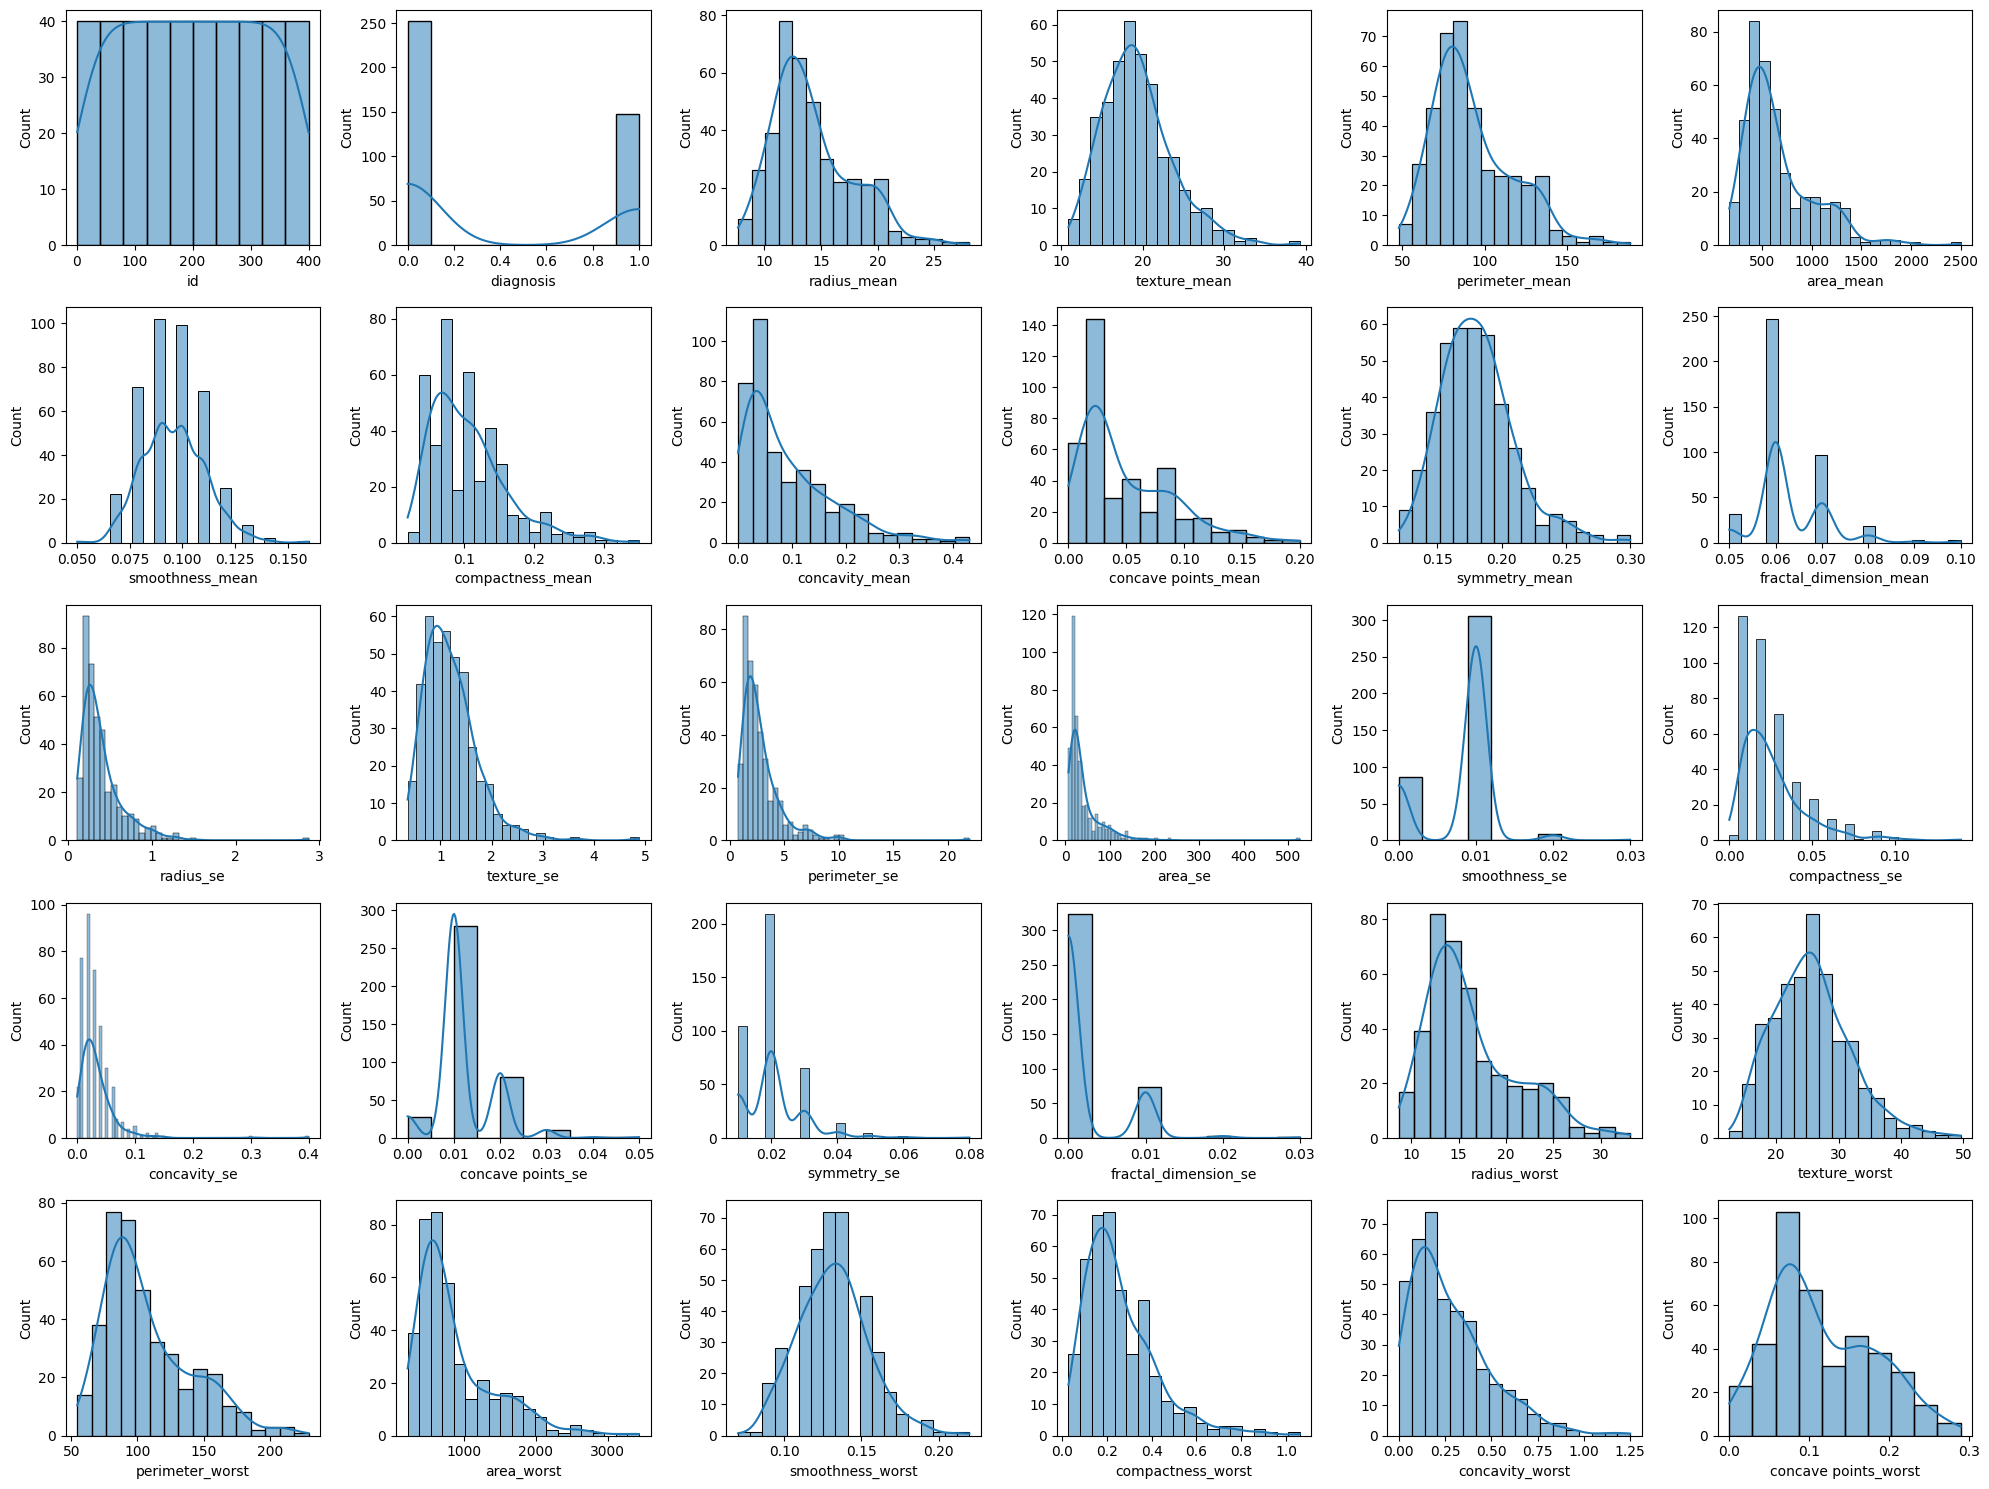

In [ ]:
#Now we started creating a grid of histograms for each column in the DataFrame
# The figure size is set to (20, 15) for better visibility.
plt.figure(figsize=(20, 15))
plotnumber = 1
# We used a loop to create up to 30 subplots (5 rows by 6 columns)
for column in data:
    if plotnumber <= 30:
        ax = plt.subplot(5, 6, plotnumber)
        sns.histplot(data[column], kde=True)  # kde=True ajoute la courbe de densite
        plt.xlabel(column)

    plotnumber += 1

plt.tight_layout()
plt.show()

##Data analyse



In [ ]:
# We start by calculating the correlation matrix of our DataFrame
data.corr()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,-0.045741,-0.066643,-0.005428,-0.068439,-0.071140,-0.033782,-0.041968,-0.069232,-0.086112,...,-0.069641,-0.017195,-0.072507,-0.072016,-0.040921,-0.039211,-0.040009,-0.061426,-0.014135,-0.013673
diagnosis,-0.045741,1.000000,0.765413,0.429345,0.777107,0.747092,0.359220,0.610486,0.690935,0.789968,...,0.805964,0.453118,0.812830,0.771718,0.433416,0.598940,0.646553,0.802386,0.461698,0.318098
radius_mean,-0.066643,0.765413,1.000000,0.355924,0.997757,0.989279,0.205341,0.515320,0.659521,0.820782,...,0.969342,0.325824,0.967032,0.945551,0.171460,0.428717,0.513428,0.746009,0.201312,0.020920
texture_mean,-0.005428,0.429345,0.355924,1.000000,0.361690,0.348637,-0.012138,0.265579,0.317065,0.315461,...,0.389817,0.914090,0.395541,0.381724,0.096796,0.318156,0.314425,0.325632,0.154946,0.148420
perimeter_mean,-0.068439,0.777107,0.997757,0.361690,1.000000,0.988159,0.241754,0.566900,0.700517,0.849860,...,0.968248,0.331056,0.971266,0.944830,0.202018,0.470952,0.551004,0.772939,0.223522,0.064427
area_mean,-0.071140,0.747092,0.989279,0.348637,0.988159,1.000000,0.204130,0.508743,0.670447,0.822656,...,0.961435,0.310725,0.959874,0.956937,0.169328,0.405684,0.500577,0.723898,0.179759,0.019390
smoothness_mean,-0.033782,0.359220,0.205341,-0.012138,0.241754,0.204130,1.000000,0.662310,0.533522,0.567815,...,0.237101,0.034925,0.260283,0.225638,0.778089,0.477562,0.437543,0.506580,0.402494,0.491435
compactness_mean,-0.041968,0.610486,0.515320,0.265579,0.566900,0.508743,0.662310,1.000000,0.891832,0.839284,...,0.535062,0.255556,0.588655,0.514161,0.570536,0.860534,0.810504,0.811856,0.496884,0.674055
concavity_mean,-0.069232,0.690935,0.659521,0.317065,0.700517,0.670447,0.533522,0.891832,1.000000,0.910977,...,0.664594,0.301094,0.706505,0.656693,0.460468,0.762836,0.880005,0.851373,0.422904,0.527826
concave points_mean,-0.086112,0.789968,0.820782,0.315461,0.849860,0.822656,0.567815,0.839284,0.910977,1.000000,...,0.824491,0.302369,0.849790,0.809272,0.479069,0.675980,0.738749,0.904683,0.396056,0.373995


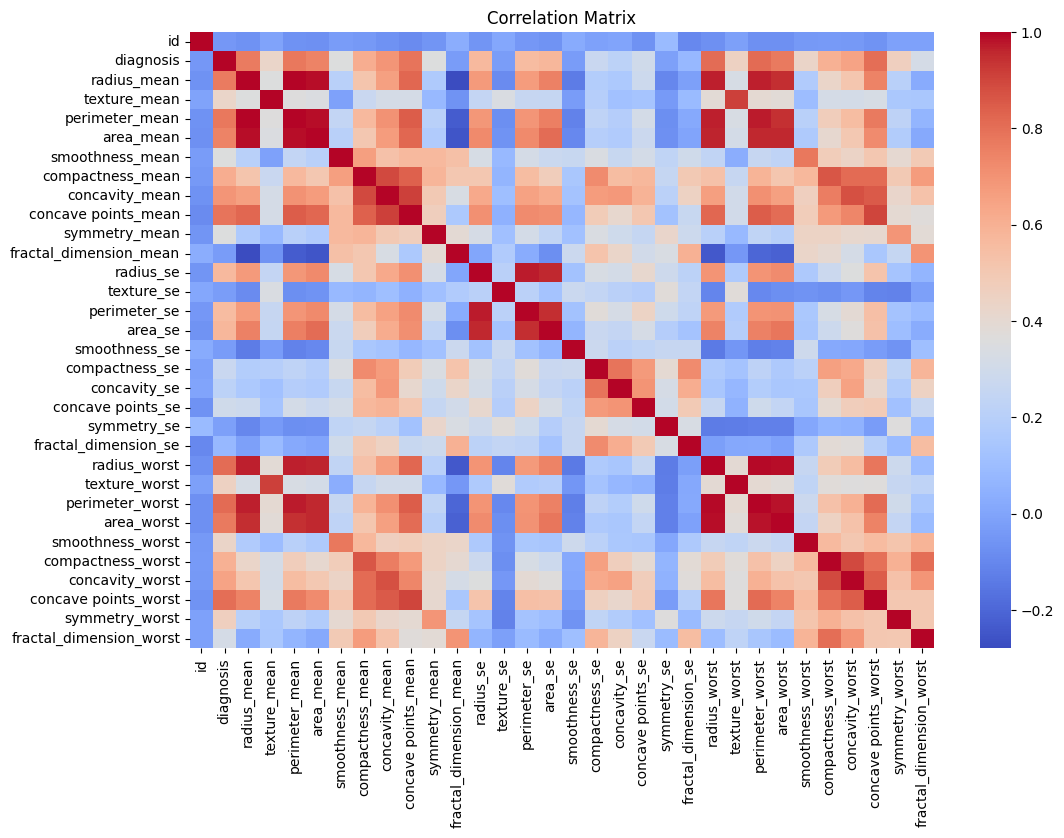

In [ ]:
correlation_matrix = data.corr()

# graphing the correlation matrix without the numbers
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


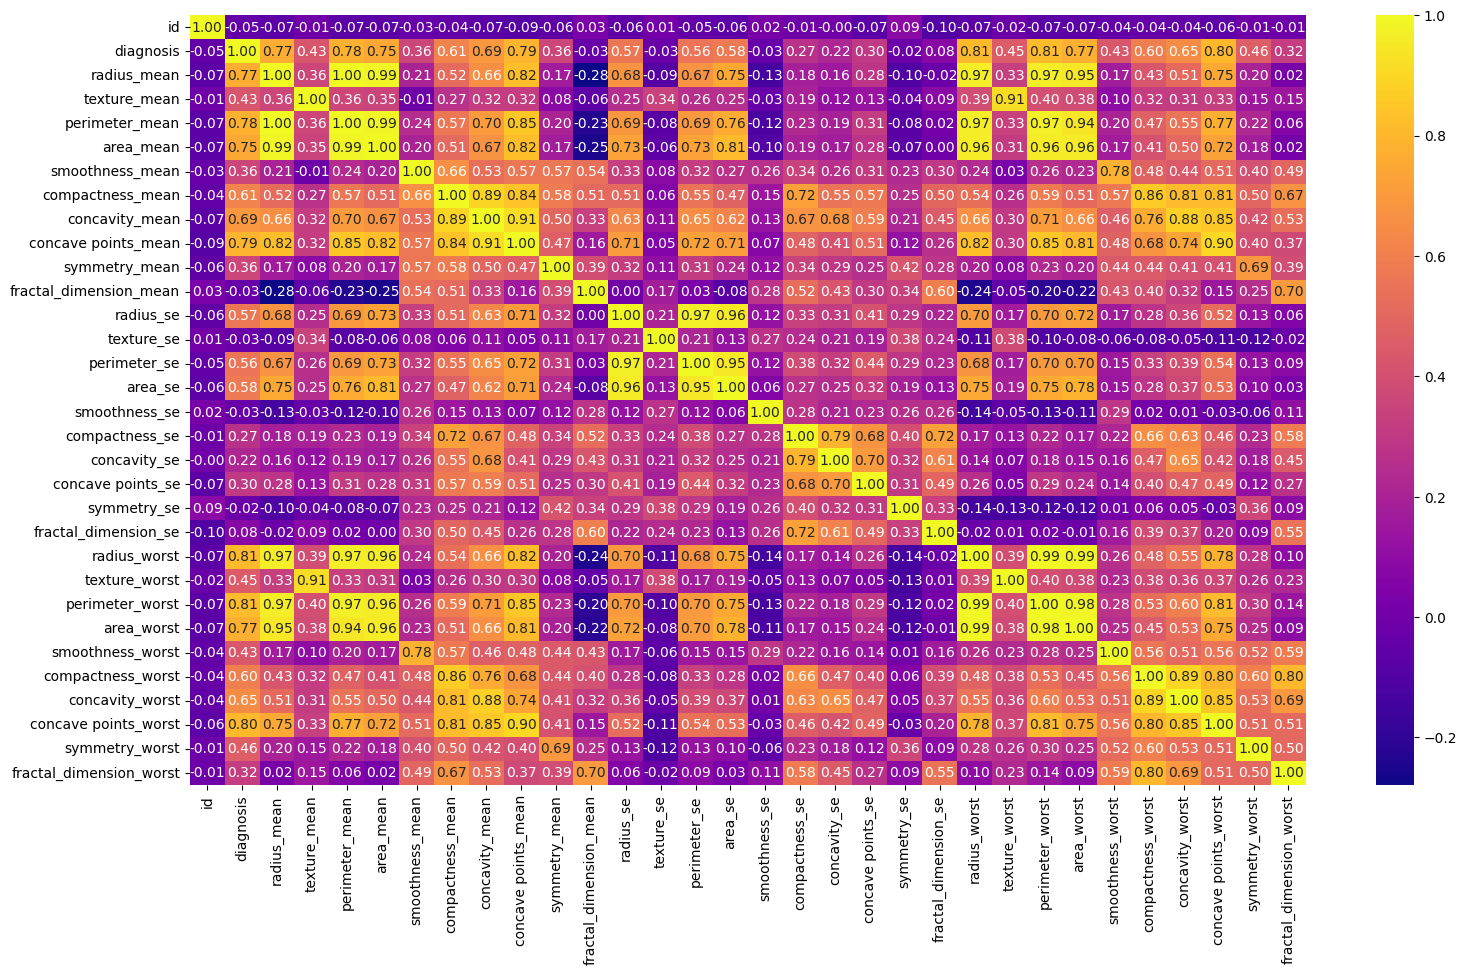

In [ ]:
#a larger plot of the matrix which is better for a larger dataset
plt.figure(figsize=(18, 10))
sns.heatmap(data.corr(), cmap='plasma', annot=True, fmt='.2f')
plt.show()

## Feature selection :

this part involves identifying and retaining the most relevant features from the dataset to improve our model accuracy.


In [ ]:
#we selected the features to drop based on out correlation matrix
features_to_drop = ['id', 'fractal_dimension_mean',
                   'smoothness_se', 'compactness_se', 'concave points_se',
                   'symmetry_se', 'fractal_dimension_se']
#the drop
data = data.drop(columns=features_to_drop)

In [ ]:
#we verify the drop of the colummns comporting the features we selected
data.shape

(400, 25)

# Splitting Data for evaluation after model building :

this part involves dividing the dataset into separate training and testing sets to assess model performance and ensure its ability to generalize to new, unseen data.

In [ ]:
#we separate features (X) from the target variable (y) by dropping 'diagnosis
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']
#Split the dataset into training and testing sets
#using 20% of the data for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#we verify
print(data.head())

   diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        11.84         18.70           77.93      440.6   
1          0        12.76         18.84           81.87      496.6   
2          1        23.29         26.67          158.90     1685.0   
3          0        12.56         19.07           81.92      485.8   
4          0         9.74         15.67           61.50      289.9   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0             0.11              0.15            0.12                 0.05   
1             0.10              0.08            0.03                 0.02   
2             0.11              0.21            0.35                 0.16   
3             0.09              0.10            0.10                 0.04   
4             0.09              0.05            0.01                 0.01   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0           0.23  ...         16.82          

## Test

In [ ]:
# Load the test dataset from a CSV file.
test= pd.read_csv('/content/drive/MyDrive/data/test.csv')
#Define a list of features to drop based on low importance
Mfeatures_to_drop = ['id', 'fractal_dimension_mean',
                   'smoothness_se', 'compactness_se', 'concave points_se',
                   'symmetry_se', 'fractal_dimension_se']
# Check if the columns exist in the DataFrame before dropping
Mfeatures_to_drop = [col for col in Mfeatures_to_drop if col in test.columns]
test = test.drop(Mfeatures_to_drop,axis=1)
test.shape

(169, 24)

# Creation de model XGBOOST




In [ ]:
#we initialize the XGBoost classifier
classifier_7 = XGBClassifier()
# Training the classifier using the training data
classifier_7.fit(X_train, y_train)
# Making predictions on the test set to evaluate model performance
Y_pred7 = classifier_7.predictY_pred7 = classifier_7.predict(test)
# Making predictions on the external test data for submission
Y_pred = classifier_7.predict(X_test)

In [ ]:
Y_pred7

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1])

In [ ]:
Y_pred7.shape

(169,)

In [ ]:
# Convert the NumPy array to a Pandas Series
Y_pred7_series = pd.Series(Y_pred7)

# Now apply .map() to convert 0 -> 'B' and 1 -> 'M'
Y_pred7_mapped = Y_pred7_series.map({0: 'B', 1: 'M'})

# Load the test data first to get the 'id' column
test_original = pd.read_csv('/content/drive/MyDrive/data/test.csv')
ids = test_original['id']

# Then proceed with feature selection
test = pd.read_csv('/content/drive/MyDrive/data/test.csv')
training_features = X_train.columns
test = test[training_features]

In [ ]:
# Convert the list of IDs to a DataFrame containing the IDs and their corresponding predicted diagnoses
idss= ids.tolist()
data = {
    'id': idss,
    'diagnosis': Y_pred7_mapped,
}

df = pd.DataFrame(data)

1.0


<Axes: xlabel='Predicted', ylabel='Actual'>

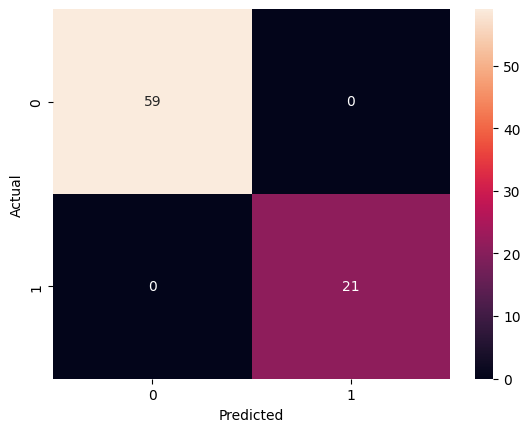

In [ ]:
 # Import the accuracy_score seaborn for heatmap
from sklearn.metrics import accuracy_score
import seaborn as sns
print (accuracy_score(y_test, Y_pred))
confusion_matrix = pd.crosstab(y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [ ]:
# Export the DataFrame to a CSV file
df.to_csv('PPXGB.csv', index=False)